


# Анализ списка разрешений на строительство.




In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

**Загружаем данные из файла, взятого с** https://www.kaggle.com/aparnashastry/building-permit-applications-data/version/1 

Data set представляет собой набор данных о разрешениях на строительство с 1 января 2013 года по 25 февраля 2018 года. Данные содержат сведения о номерах разрешений, надзорных округах и текущем статусе заявок. 

Чем интересен этот набор, так это тем, что однозначно не поставить задачу для получения информации, которую нужно извлечь из таблицы. Этот набор полезен, к примеру, для строителей, подрядчиков, агентов по недвижимости, каждый из которых будет искать ответ на свой вопрос из определенных категорий и объема данных. 

Мне стало интересно узнать из этого набора данных, какова стоимость построек в зависимости от их расположения, применения. 









In [2]:
data = pd.read_csv('c:/Users/Novozhilova Nastya/AnacondaProjects/Machine_learning/Building.csv', sep = ',', engine = 'python')

In [3]:
type(data)

pandas.core.frame.DataFrame

Данных достаточно много, поэтому покажем малую часть.








In [4]:
data[:10]

,Permit Number,Permit Type,Permit Type Definition,Permit Creation Date,Block,Lot,Street Number,Street Number Suffix,Street Name,Street Suffix,...,Existing Construction Type,Existing Construction Type Description,Proposed Construction Type,Proposed Construction Type Description,Site Permit,Supervisor District,Neighborhoods - Analysis Boundaries,Zipcode,Location,Record ID
0,201505065519,4,sign - erect,05/06/2015,0326,023,140.0,NaN,Ellis,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.785719256680785, -122.40852313194863)",1.380611e+12
1,201604195146,4,sign - erect,04/19/2016,0306,007,440.0,NaN,Geary,St,...,3.0,constr type 3,NaN,NaN,NaN,3.0,Tenderloin,94102.0,"(37.78733980600732, -122.41063199757738)",1.420164e+12
2,201605278609,3,additions alterations or repairs,05/27/2016,0595,203,1647.0,NaN,Pacific,Av,...,1.0,constr type 1,1.0,constr type 1,NaN,3.0,Russian Hill,94109.0,"(37.7946573324287, -122.42232562979227)",1.424857e+12
3,201611072166,8,otc alterations permit,11/07/2016,0156,011,1230.0,NaN,Pacific,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,3.0,Nob Hill,94109.0,"(37.79595867909168, -122.41557405519474)",1.443574e+12
4,201611283529,6,demolitions,11/28/2016,0342,001,950.0,NaN,Market,St,...,3.0,constr type 3,NaN,NaN,NaN,6.0,Tenderloin,94102.0,"(37.78315261897309, -122.40950883997789)",1.445482e+11
5,201706149344,8,otc alterations permit,06/14/2017,4105,009,800.0,NaN,Indiana,St,...,1.0,constr type 1,1.0,constr type 1,NaN,10.0,Potrero Hill,94107.0,"(37.75922331346539, -122.39170402628598)",1.466911e+12
6,201706300814,8,otc alterations permit,06/30/2017,1739,020,1291.0,NaN,11th,Av,...,5.0,wood frame (5),5.0,wood frame (5),NaN,5.0,Inner Sunset,94122.0,"(37.764145640138565, -122.46875112470363)",1.468970e+12
7,M803667,8,otc alterations permit,06/30/2017,4789,014,1465.0,NaN,Revere,Av,...,NaN,NaN,NaN,NaN,NaN,10.0,Bayview Hunters Point,94124.0,"(37.73005099023611, -122.38784938916618)",1.469035e+12
8,M804227,8,otc alterations permit,07/05/2017,1212,054,2094.0,NaN,Fell,St,...,NaN,NaN,NaN,NaN,NaN,5.0,Lone Mountain/USF,94117.0,"(37.772393498502595, -122.45231466824669)",1.469198e+12
9,M804767,8,otc alterations permit,07/06/2017,1259,016,89.0,NaN,Alpine,Tr,...,NaN,NaN,NaN,NaN,NaN,8.0,Haight Ashbury,94117.0,"(37.7691724293766, -122.43734859051908)",1.469324e+11


In [5]:
print(data[:10])

  Permit Number  Permit Type            Permit Type Definition  \
0  201505065519            4                      sign - erect   
1  201604195146            4                      sign - erect   
2  201605278609            3  additions alterations or repairs   
3  201611072166            8            otc alterations permit   
4  201611283529            6                       demolitions   
5  201706149344            8            otc alterations permit   
6  201706300814            8            otc alterations permit   
7       M803667            8            otc alterations permit   
8       M804227            8            otc alterations permit   
9       M804767            8            otc alterations permit   

  Permit Creation Date Block  Lot  Street Number Street Number Suffix  \
0           05/06/2015  0326  023          140.0                  NaN   
1           04/19/2016  0306  007          440.0                  NaN   
2           05/27/2016  0595  203         1647.0      

Видим,что данные содержат 43 колонки - 43 различных признака. 
Некоторые признаки не будем принимать во внимание, удалим их из набора.








In [6]:
data = data.drop(['Block', 'Lot', 'Street Number Suffix', 'Unit', 'Unit Suffix', 'Structural Notification','Number of Existing Stories', 'Number of Proposed Stories','Voluntary Soft-Story Retrofit', 'Fire Only Permit', 'Permit Expiration Date', 'Revised Cost', 'Existing Units','Proposed Use', 'Proposed Units', 'Plansets', 'TIDF Compliance', 'Proposed Construction Type', 'Proposed Construction Type Description', 'Site Permit', 'Supervisor District', 'Zipcode', 'Location', 'Issued Date','First Construction Document Date', 'Permit Creation Date', 'Current Status Date', 'Filed Date', 'Permit Type Definition', 'Permit Type','Street Number','Description', 'Completed Date', 'Current Status', 'Record ID\t\t\t\t\t\t\t'],axis = 1)

Вновь отобразим данные, теперь с меньшим количеством признаков.








In [7]:
data[:10] 

,Permit Number,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type,Existing Construction Type Description,Neighborhoods - Analysis Boundaries
0,201505065519,Ellis,St,4000.0,tourist hotel/motel,3.0,constr type 3,Tenderloin
1,201604195146,Geary,St,1.0,tourist hotel/motel,3.0,constr type 3,Tenderloin
2,201605278609,Pacific,Av,20000.0,retail sales,1.0,constr type 1,Russian Hill
3,201611072166,Pacific,Av,2000.0,1 family dwelling,5.0,wood frame (5),Nob Hill
4,201611283529,Market,St,100000.0,retail sales,3.0,constr type 3,Tenderloin
5,201706149344,Indiana,St,4000.0,apartments,1.0,constr type 1,Potrero Hill
6,201706300814,11th,Av,12000.0,apartments,5.0,wood frame (5),Inner Sunset
7,M803667,Revere,Av,NaN,NaN,NaN,NaN,Bayview Hunters Point
8,M804227,Fell,St,NaN,NaN,NaN,NaN,Lone Mountain/USF
9,M804767,Alpine,Tr,NaN,NaN,NaN,NaN,Haight Ashbury


In [8]:
data = data.drop(['Permit Number', 'Neighborhoods - Analysis Boundaries'], axis = 1)

In [9]:
data[:10]

,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type,Existing Construction Type Description
0,Ellis,St,4000.0,tourist hotel/motel,3.0,constr type 3
1,Geary,St,1.0,tourist hotel/motel,3.0,constr type 3
2,Pacific,Av,20000.0,retail sales,1.0,constr type 1
3,Pacific,Av,2000.0,1 family dwelling,5.0,wood frame (5)
4,Market,St,100000.0,retail sales,3.0,constr type 3
5,Indiana,St,4000.0,apartments,1.0,constr type 1
6,11th,Av,12000.0,apartments,5.0,wood frame (5)
7,Revere,Av,NaN,NaN,NaN,NaN
8,Fell,St,NaN,NaN,NaN,NaN
9,Alpine,Tr,NaN,NaN,NaN,NaN


Оставили ниже представленные признаки:

- `Permit Number`- номер разрешения
- `Permit Type` - тип разрешения
- `Permit Type Definition`- описание типа разрешения
- `Permit Creation Date`- дата создания разрешения
- `Street Number` - номер улицы
- `Street Name` - название улицы
- `Street Suffix` - уличный суффикс (проспект, улица)
- `Description` - описание
- `Current Status` - текущий статус
- `Current Status Date` - дата текущего статуса
- `Filed Date` - дата подачи
- `Issued Date` - дата выпуска
- `Completed Date` - дата завершения
- `First Construction Document Date` -  дата первой строительной документации
- `Estimated Cost` - оценочная стоимость
- `Existing Use` - использование
- `Existing Construction Type` - тип конструкции
- `Existing Construction Type Description` - описание типа конструкции






In [10]:
data.head()

,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type,Existing Construction Type Description
0,Ellis,St,4000.0,tourist hotel/motel,3.0,constr type 3
1,Geary,St,1.0,tourist hotel/motel,3.0,constr type 3
2,Pacific,Av,20000.0,retail sales,1.0,constr type 1
3,Pacific,Av,2000.0,1 family dwelling,5.0,wood frame (5)
4,Market,St,100000.0,retail sales,3.0,constr type 3


In [11]:
data.tail()

,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type,Existing Construction Type Description
9878,22nd,Av,11000.0,1 family dwelling,5.0,wood frame (5)
9879,Temescal,Tr,1000.0,1 family dwelling,5.0,wood frame (5)
9880,Vienna,St,8700.0,1 family dwelling,5.0,wood frame (5)
9881,05th,Av,15000.0,2 family dwelling,5.0,wood frame (5)
9882,38th,Av,40000.0,1 family dwelling,5.0,wood frame (5)


In [12]:
print(data.shape)
print(data.columns)

(9883, 6)
Index(['Street Name', 'Street Suffix', 'Estimated Cost', 'Existing Use',
       'Existing Construction Type', 'Existing Construction Type Description'],
      dtype='object')


In [11]:
data.index

RangeIndex(start=0, stop=9883, step=1)

Посмотрим на некоторые выбранные данные








In [13]:
data.at[8, 'Street Name']

'Fell'

In [14]:
data['Street Name'][:10]

0      Ellis
1      Geary
2    Pacific
3    Pacific
4     Market
5    Indiana
6       11th
7     Revere
8       Fell
9     Alpine
Name: Street Name, dtype: object

In [15]:
data['Street Name'][12]

'25th'

In [16]:
data['Estimated Cost'].dtype.name

'float64'

In [17]:
type(data['Street Name'][3])

str

In [18]:
type(data['Street Name'])

pandas.core.series.Series

In [19]:
data[['Estimated Cost', 'Street Name']].head()

,Estimated Cost,Street Name
0,4000.0,Ellis
1,1.0,Geary
2,20000.0,Pacific
3,2000.0,Pacific
4,100000.0,Market


Выведем таблицу, содержащую статистическую информацию.








In [20]:
data.describe()

,Estimated Cost,Existing Construction Type
count,7.955000e+03,7721.000000
mean,1.319661e+05,4.077322
std,3.425610e+06,1.571724
min,1.000000e+00,1.000000
25%,2.500000e+03,3.000000
50%,9.000000e+03,5.000000
75%,2.500000e+04,5.000000
max,2.720000e+08,5.000000


Диаграмма матрицы рассеивания примет следующий вид:








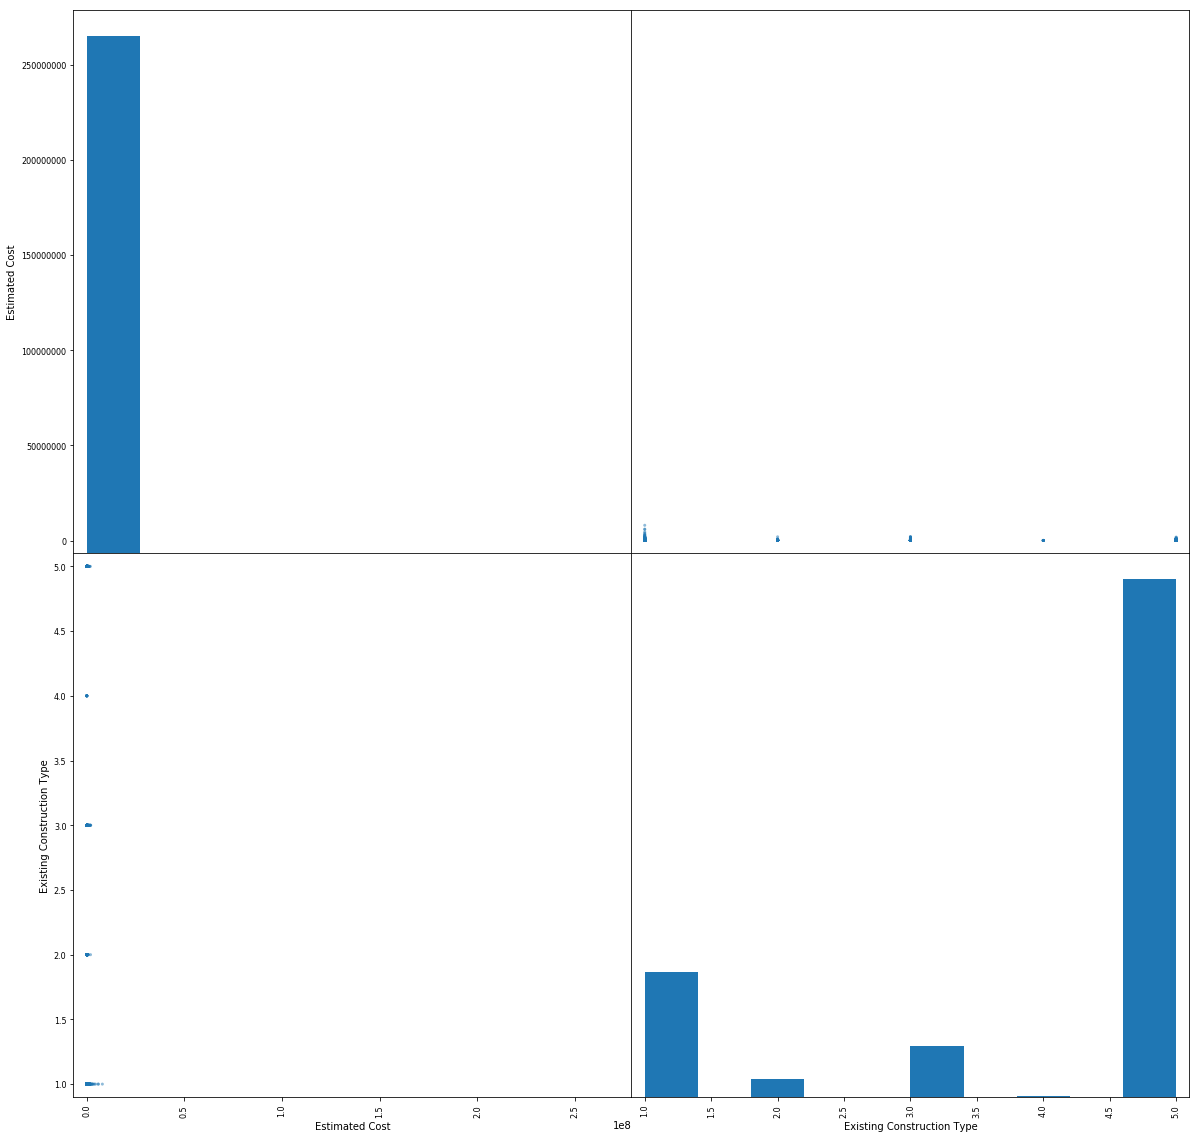

In [21]:
from pandas.plotting import scatter_matrix
scatter_matrix(data, alpha = .5, figsize = (20, 20))
pass

Корреляция признаков в таблице:








In [22]:
data.corr()

,Estimated Cost,Existing Construction Type
Estimated Cost,1.000000,-0.181723
Existing Construction Type,-0.181723,1.000000


Зависимость типа конструкции от стоимости:








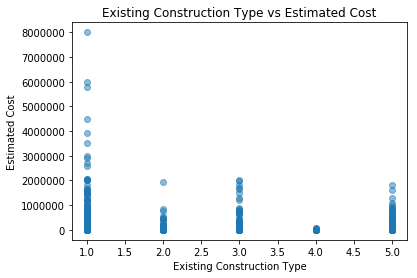

In [23]:
plt.plot(data['Existing Construction Type'], data['Estimated Cost'],  'o', alpha = 0.5)
plt.xlabel('Existing Construction Type')
plt.ylabel('Estimated Cost')
plt.title('Existing Construction Type vs Estimated Cost')
pass

Какие из улиц имеют суффикс 'Av' - проспект?








In [24]:
data['Street Suffix'][:15] == 'Av'

0     False
1     False
2      True
3      True
4     False
5     False
6      True
7      True
8     False
9     False
10    False
11    False
12    False
13    False
14    False
Name: Street Suffix, dtype: bool

In [25]:
data.describe(include = ['object'])

,Street Name,Street Suffix,Existing Use,Existing Construction Type Description
count,9883,9760,7824,7721
unique,1006,16,59,6
top,Market,St,1 family dwelling,wood frame (5)
freq,343,7052,2489,5604


In [26]:
data.describe(include = 'all')

,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type,Existing Construction Type Description
count,9883,9760,7.955000e+03,7824,7721.000000,7721
unique,1006,16,NaN,59,NaN,6
top,Market,St,NaN,1 family dwelling,NaN,wood frame (5)
freq,343,7052,NaN,2489,NaN,5604
mean,NaN,NaN,1.319661e+05,NaN,4.077322,NaN
std,NaN,NaN,3.425610e+06,NaN,1.571724,NaN
min,NaN,NaN,1.000000e+00,NaN,1.000000,NaN
25%,NaN,NaN,2.500000e+03,NaN,3.000000,NaN
50%,NaN,NaN,9.000000e+03,NaN,5.000000,NaN
75%,NaN,NaN,2.500000e+04,NaN,5.000000,NaN


In [27]:
data['Existing Use'].unique()

array(['tourist hotel/motel', 'retail sales', '1 family dwelling',
       'apartments', nan, '2 family dwelling', 'church', 'storage shed',
       'office', 'vacant lot', 'food/beverage hndlng',
       'residential hotel', 'filling/service stn', 'workshop commercial',
       'clinics-medic/dental', 'misc group residns.', 'hospital', 'club',
       'barber/beauty salon', 'warehouse,no frnitur', 'school',
       'artist live/work', 'manufacturing', 'garment shops',
       'public assmbly other', 'auto repairs', 'lending institution',
       'museum', 'warehouse, furniture', 'prkng garage/private',
       'antenna', 'health studios & gym', 'massage parlor',
       'printing plant', 'parking lot', 'workshop residential',
       'power plant', 'tower', 'mortuary', 'animal sale or care',
       'laundry/laundromat', 'nite club', 'paint store',
       'recreation bldg', 'theater', 'prkng garage/public', 'sign',
       'phone xchnge/equip', 'dance hall', 'sfpd or sffd station',
       'storage

In [28]:
data['Street Name'].unique()

array(['Ellis', 'Geary', 'Pacific', ..., 'Maple', 'Colby', 'Robblee'],
      dtype=object)



Пару столбцов можем удалить, так как они идентичны с одной категорией и большой роли не играют.


In [28]:
data.drop(['Existing Construction Type'], axis = 1) 

,Permit Number,Permit Type,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type Description,Neighborhoods - Analysis Boundaries
0,201505065519,4,Ellis,St,4000.0,tourist hotel/motel,constr type 3,Tenderloin
1,201604195146,4,Geary,St,1.0,tourist hotel/motel,constr type 3,Tenderloin
2,201605278609,3,Pacific,Av,20000.0,retail sales,constr type 1,Russian Hill
3,201611072166,8,Pacific,Av,2000.0,1 family dwelling,wood frame (5),Nob Hill
4,201611283529,6,Market,St,100000.0,retail sales,constr type 3,Tenderloin
5,201706149344,8,Indiana,St,4000.0,apartments,constr type 1,Potrero Hill
6,201706300814,8,11th,Av,12000.0,apartments,wood frame (5),Inner Sunset
7,M803667,8,Revere,Av,NaN,NaN,NaN,Bayview Hunters Point
8,M804227,8,Fell,St,NaN,NaN,NaN,Lone Mountain/USF
9,M804767,8,Alpine,Tr,NaN,NaN,NaN,Haight Ashbury


# Подготовка данных

In [29]:
data['Street Name'].dtype.name

'object'

In [30]:
data['Estimated Cost'].dtype.name

'float64'

Разобьем данные на категориальные и числовые характеристики.








In [31]:
categorical_columns = [c for c in data.columns if data[c].dtype.name == 'object']
numerical_columns   = [c for c in data.columns if data[c].dtype.name != 'object']
print(categorical_columns)
print(numerical_columns)

['Street Name', 'Street Suffix', 'Existing Use', 'Existing Construction Type Description']
['Estimated Cost', 'Existing Construction Type']


In [32]:
for c in categorical_columns:
    print(c, data[c].unique())

Street Name ['Ellis' 'Geary' 'Pacific' ... 'Maple' 'Colby' 'Robblee']
Street Suffix ['St' 'Av' 'Tr' 'Ct' 'Bl' 'Wy' 'Dr' nan 'Rd' 'Cr' 'Pl' 'Ln' 'Hy' 'Pk' 'Al'
 'Pz' '02/09/2017']
Existing Use ['tourist hotel/motel' 'retail sales' '1 family dwelling' 'apartments' nan
 '2 family dwelling' 'church' 'storage shed' 'office' 'vacant lot'
 'food/beverage hndlng' 'residential hotel' 'filling/service stn'
 'workshop commercial' 'clinics-medic/dental' 'misc group residns.'
 'hospital' 'club' 'barber/beauty salon' 'warehouse,no frnitur' 'school'
 'artist live/work' 'manufacturing' 'garment shops' 'public assmbly other'
 'auto repairs' 'lending institution' 'museum' 'warehouse, furniture'
 'prkng garage/private' 'antenna' 'health studios & gym' 'massage parlor'
 'printing plant' 'parking lot' 'workshop residential' 'power plant'
 'tower' 'mortuary' 'animal sale or care' 'laundry/laundromat' 'nite club'
 'paint store' 'recreation bldg' 'theater' 'prkng garage/public' 'sign'
 'phone xchnge/equip' 'd

## Обработка пропущенных значений


Для категориальных признаков пропущенные значения можно заполнить самым популярным значением в столбце.

In [33]:
data.median(axis = 0)

Estimated Cost                9000.0
Existing Construction Type       5.0
dtype: float64

In [34]:
data = data.fillna(data.median(axis = 0), axis = 0)

In [35]:
data[numerical_columns].count(axis = 0)

Estimated Cost                9883
Existing Construction Type    9883
dtype: int64

In [36]:
data[categorical_columns].count(axis = 0)

Street Name                               9883
Street Suffix                             9760
Existing Use                              7824
Existing Construction Type Description    7721
dtype: int64

В колонках есть пропущенные значения. Обработаем их.








In [37]:
data['Existing Use'].describe()

count                  7824
unique                   59
top       1 family dwelling
freq                   2489
Name: Existing Use, dtype: object

In [38]:
type(data['Existing Use'].describe())

pandas.core.series.Series

In [39]:
data['Existing Use'].describe().top

'1 family dwelling'

In [40]:
data['Existing Use'] = data['Existing Use'].fillna('1 family dwelling')

In [41]:
data.describe(include = [object])

,Street Name,Street Suffix,Existing Use,Existing Construction Type Description
count,9883,9760,9883,7721
unique,1006,16,59,6
top,Market,St,1 family dwelling,wood frame (5)
freq,343,7052,4548,5604


In [42]:
data_describe = data.describe(include = [object])
for c in categorical_columns:
    data[c] = data[c].fillna(data_describe[c]['top'])

In [43]:
data.describe(include = [object])

,Street Name,Street Suffix,Existing Use,Existing Construction Type Description
count,9883,9883,9883,9883
unique,1006,16,59,6
top,Market,St,1 family dwelling,wood frame (5)
freq,343,7175,4548,7766


Теперь пропущенных значений нет, перейдем к **векторизации**.


In [44]:
data.describe(include = 'all')

,Street Name,Street Suffix,Estimated Cost,Existing Use,Existing Construction Type,Existing Construction Type Description
count,9883,9883,9.883000e+03,9883,9883.000000,9883
unique,1006,16,NaN,59,NaN,6
top,Market,St,NaN,1 family dwelling,NaN,wood frame (5)
freq,343,7175,NaN,4548,NaN,7766
mean,NaN,NaN,1.079776e+05,NaN,4.279166,NaN
std,NaN,NaN,3.073710e+06,NaN,1.440614,NaN
min,NaN,NaN,1.000000e+00,NaN,1.000000,NaN
25%,NaN,NaN,3.887500e+03,NaN,5.000000,NaN
50%,NaN,NaN,9.000000e+03,NaN,5.000000,NaN
75%,NaN,NaN,2.000000e+04,NaN,5.000000,NaN


In [45]:
binary_columns    = [c for c in categorical_columns if data_describe[c]['unique'] == 2]
nonbinary_columns = [c for c in categorical_columns if data_describe[c]['unique'] > 2]
print(binary_columns, nonbinary_columns)

[] ['Street Name', 'Street Suffix', 'Existing Use', 'Existing Construction Type Description']


In [46]:
data['Existing Construction Type Description'].unique()

array(['constr type 3', 'constr type 1', 'wood frame (5)',
       'constr type 2', 'constr type 4', 'Inner Richmond'], dtype=object)

In [47]:
data.at[data['Existing Construction Type Description'] == 'constr type 1', 'Existing Construction Type Description'] = 1
data.at[data['Existing Construction Type Description'] == 'constr type 2', 'Existing Construction Type Description'] = 2
data.at[data['Existing Construction Type Description'] == 'constr type 3', 'Existing Construction Type Description'] = 3
data.at[data['Existing Construction Type Description'] == 'constr type 4', 'Existing Construction Type Description'] = 4
data.at[data['Existing Construction Type Description'] == 'wood frame (5)', 'Existing Construction Type Description'] = 5
data.at[data['Existing Construction Type Description'] == 'Inner Richmond', 'Existing Construction Type Description'] = 6
data['Existing Construction Type Description'].describe()

count    9883.000000
mean        4.279672
std         1.440340
min         1.000000
25%         5.000000
50%         5.000000
75%         5.000000
max         6.000000
Name: Existing Construction Type Description, dtype: float64

In [48]:
data['Existing Construction Type Description'].unique()

array([3, 1, 5, 2, 4, 6], dtype=int64)

In [49]:
data_nonbinary = pd.get_dummies(data[nonbinary_columns])
print(data_nonbinary.columns)

Index(['Existing Construction Type Description', 'Street Name_01st',
       'Street Name_02nd', 'Street Name_03rd', 'Street Name_04th',
       'Street Name_05th', 'Street Name_06th', 'Street Name_07th',
       'Street Name_08th', 'Street Name_09th',
       ...
       'Existing Use_storage shed', 'Existing Use_storage tanks',
       'Existing Use_theater', 'Existing Use_tourist hotel/motel',
       'Existing Use_tower', 'Existing Use_vacant lot',
       'Existing Use_warehouse, furniture',
       'Existing Use_warehouse,no frnitur', 'Existing Use_workshop commercial',
       'Existing Use_workshop residential'],
      dtype='object', length=1082)


## Нормализация количественных признаков



In [50]:
data_numerical = data[numerical_columns]
data_numerical.describe()

,Estimated Cost,Existing Construction Type
count,9.883000e+03,9883.000000
mean,1.079776e+05,4.279166
std,3.073710e+06,1.440614
min,1.000000e+00,1.000000
25%,3.887500e+03,5.000000
50%,9.000000e+03,5.000000
75%,2.000000e+04,5.000000
max,2.720000e+08,5.000000


In [51]:
data_numerical = (data_numerical - data_numerical.mean(axis = 0))/data_numerical.std(axis = 0)

In [52]:
data_numerical.describe()

,Estimated Cost,Existing Construction Type
count,9883.000000,9.883000e+03
mean,0.000000,-1.581700e-16
std,1.000000,1.000000e+00
min,-0.035129,-2.276229e+00
25%,-0.033865,5.003658e-01
50%,-0.032201,5.003658e-01
75%,-0.028623,5.003658e-01
max,88.457275,5.003658e-01


## Соединяем все в одну таблицу

In [71]:
data = pd.concat((data_numerical, data_nonbinary), axis = 1)
print(data.shape)


(9883, 1084)


In [72]:
data.describe()

,Estimated Cost,Existing Construction Type,Existing Construction Type Description,Street Name_01st,Street Name_02nd,Street Name_03rd,Street Name_04th,Street Name_05th,Street Name_06th,Street Name_07th,...,Existing Use_storage shed,Existing Use_storage tanks,Existing Use_theater,Existing Use_tourist hotel/motel,Existing Use_tower,Existing Use_vacant lot,"Existing Use_warehouse, furniture","Existing Use_warehouse,no frnitur",Existing Use_workshop commercial,Existing Use_workshop residential
count,9883.000000,9.883000e+03,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,...,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000,9883.000000
mean,0.000000,-1.581700e-16,4.279672,0.000708,0.004149,0.012446,0.003238,0.004654,0.003137,0.002631,...,0.001214,0.000101,0.000506,0.008297,0.000101,0.006577,0.000202,0.002833,0.000607,0.000101
std,1.000000,1.000000e+00,1.440340,0.026606,0.064279,0.110869,0.056813,0.068068,0.055921,0.051226,...,0.034826,0.010059,0.022488,0.090714,0.010059,0.080835,0.014225,0.053155,0.024633,0.010059
min,-0.035129,-2.276229e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-0.033865,5.003658e-01,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-0.032201,5.003658e-01,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,-0.028623,5.003658e-01,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,88.457275,5.003658e-01,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


# X и y

In [73]:
X = data.drop(('Existing Construction Type'), axis = 1) # выбрасываем столбец 'Existing Construction Type'
y = data['Existing Construction Type']
feature_names = X.columns
feature_names


Index(['Estimated Cost', 'Existing Construction Type Description',
       'Street Name_01st', 'Street Name_02nd', 'Street Name_03rd',
       'Street Name_04th', 'Street Name_05th', 'Street Name_06th',
       'Street Name_07th', 'Street Name_08th',
       ...
       'Existing Use_storage shed', 'Existing Use_storage tanks',
       'Existing Use_theater', 'Existing Use_tourist hotel/motel',
       'Existing Use_tower', 'Existing Use_vacant lot',
       'Existing Use_warehouse, furniture',
       'Existing Use_warehouse,no frnitur', 'Existing Use_workshop commercial',
       'Existing Use_workshop residential'],
      dtype='object', length=1083)

In [74]:
print(X.shape)
print(y.shape)
N, d = X.shape

(9883, 1083)
(9883,)


In [57]:
type(X)

pandas.core.frame.DataFrame

In [58]:
type(y)

pandas.core.series.Series

Разобьем данные на 2 части: тестовую и обучающую, в соотношении 30% и 70%
    

In [133]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

N_train, _ = X_train.shape 
N_test,  _ = X_test.shape 

print(N_train, N_test)

6918 2965


In [134]:
print(N_train + N_test)

9883


In [205]:
y_train = y_train.astype('int')
y_test = y_test.astype('int')


Обучаем классификатор.
    

In [136]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100,), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [137]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)

In [138]:
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0003372681281618887


In [139]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1.0 0.9996627318718381


In [140]:
print(1 - mlp_model.score(X_test, y_test))

0.0003372681281619272


In [141]:
alpha_arr = np.logspace(-4, -1, 10)
print(alpha_arr)

[0.0001     0.00021544 0.00046416 0.001      0.00215443 0.00464159
 0.01       0.02154435 0.04641589 0.1       ]


Подберем оптимальное значение параметра регуляризации `alpha`    

In [142]:
alpha_arr = np.logspace(-4, 2, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

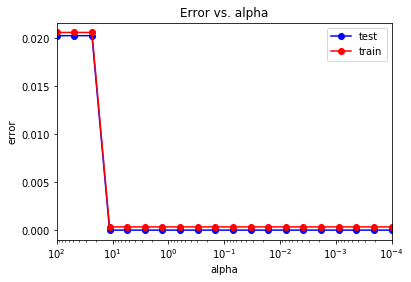

In [143]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

Минимальное значение ошибки.
    

In [144]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0003372681281618887


In [145]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)

[1.00000000e-04 2.06913808e-04 4.28133240e-04 8.85866790e-04
 1.83298071e-03 3.79269019e-03 7.84759970e-03 1.62377674e-02
 3.35981829e-02 6.95192796e-02 1.43844989e-01 2.97635144e-01
 6.15848211e-01 1.27427499e+00 2.63665090e+00 5.45559478e+00
 1.12883789e+01]


In [146]:
alpha_opt = alpha_opt[0]

Повторим обучение.
    

In [147]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0003372681281618887


Матрица рассогласования.
    

In [148]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 420    0    0]
 [   0   60    0]
 [   1    0 2484]]


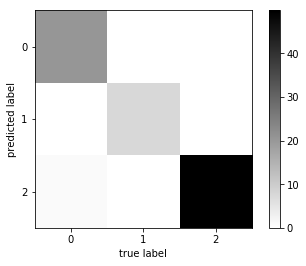

In [149]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass

In [150]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_test_pred))

              precision    recall  f1-score   support

          -2       1.00      1.00      1.00       421
          -1       1.00      1.00      1.00        60
           0       1.00      1.00      1.00      2484

   micro avg       1.00      1.00      1.00      2965
   macro avg       1.00      1.00      1.00      2965
weighted avg       1.00      1.00      1.00      2965



Попробуем другие параметры.    

In [188]:
from sklearn.neural_network import MLPClassifier
mlp_model = MLPClassifier(hidden_layer_sizes = (100,2), solver = 'lbfgs', 
                          activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)


MLPClassifier(activation='logistic', alpha=0.0001, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(100, 2), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=42, shuffle=True, solver='lbfgs', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)

In [189]:
y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred), np.mean(y_test != y_test_pred))

0.0 0.0003372681281618887


In [190]:
print(mlp_model.score(X_train, y_train), mlp_model.score(X_test, y_test))

1.0 0.9996627318718381


In [191]:
print(1 - mlp_model.score(X_test, y_test))

0.0003372681281619272


In [204]:
alpha_arr = np.logspace(-4, 2, 20)
test_err = []
train_err = []
for alpha in alpha_arr:
    mlp_model = MLPClassifier(alpha = alpha, hidden_layer_sizes = (100,2), 
                              solver = 'lbfgs', activation = 'logistic', random_state = 42)
    mlp_model.fit(X_train, y_train)

    y_train_pred = mlp_model.predict(X_train)
    y_test_pred = mlp_model.predict(X_test)
    train_err.append(np.mean(y_train != y_train_pred))
    test_err.append(np.mean(y_test != y_test_pred))

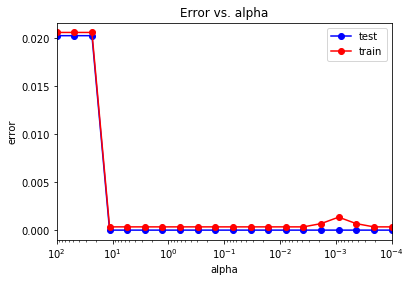

In [206]:
plt.semilogx(alpha_arr, train_err, 'b-o', label = 'test')
plt.semilogx(alpha_arr, test_err, 'r-o', label = 'train')
plt.xlim([np.max(alpha_arr), np.min(alpha_arr)])
plt.title('Error vs. alpha')
plt.xlabel('alpha')
plt.ylabel('error')
plt.legend()
pass

In [207]:
min_train_err = np.min(train_err)
min_test_err = np.min(test_err)
print(min_train_err, min_test_err)

0.0 0.0003372681281618887


In [208]:
alpha_opt = alpha_arr[test_err == min_test_err]
print(alpha_opt)
alpha_opt = alpha_opt[0]

[1.00000000e-04 2.06913808e-04 3.79269019e-03 7.84759970e-03
 1.62377674e-02 3.35981829e-02 6.95192796e-02 1.43844989e-01
 2.97635144e-01 6.15848211e-01 1.27427499e+00 2.63665090e+00
 5.45559478e+00 1.12883789e+01]


In [210]:
mlp_model = MLPClassifier(alpha = alpha_opt, hidden_layer_sizes = (100,2),
                          solver = 'lbfgs', activation = 'logistic', random_state = 42)
mlp_model.fit(X_train, y_train)

y_train_pred = mlp_model.predict(X_train)
y_test_pred = mlp_model.predict(X_test)
print(np.mean(y_train != y_train_pred))
print(np.mean(y_test != y_test_pred))

0.0
0.0003372681281618887


In [211]:
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test_pred, y_test))

[[ 420    0    0]
 [   0   60    0]
 [   1    0 2484]]


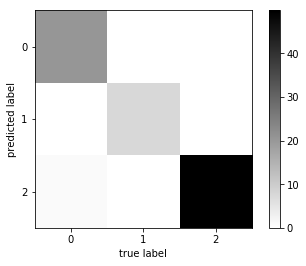

In [212]:
M = confusion_matrix(y_test_pred, y_test)
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.xticks(range(3))
plt.yticks(range(3))
plt.xlabel("true label")
plt.ylabel("predicted label")
plt.colorbar()
pass